# import Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from plantReco.processing_func import *
import cv2
import pandas as pd
import seaborn as sns
import random

# definde functions

In [2]:
# function returns a dictionary of images names sorted in this form {(plant, disease) : [img1, img2, ....]} where images stored in folders having names in this form plant___disease
def read_images_names(folder_path):
    
    # List all files in the dataset directory
    all_folder_names = os.listdir(folder_path)
    
    # store the names of training images depending on their folder names (plant___disease)
    images_names_dict = { (folder_name.split("___")[0], folder_name.split("___")[1]): os.listdir(os.path.join(folder_path, folder_name))
    for folder_name in all_folder_names }
    return images_names_dict
    

In [3]:
# function returns a dictionary in this form {(plant, disease): images_count}
def images_counter(img_names_dict):
    images_counts = {}
    for key, value in img_names_dict.items():
        images_counts[key] = len(value)
    return images_counts
    

In [4]:
def plot_image_counts_dict(images_counts):
    """
    Plots the number of training images for each plant___disease.

    Parameters:
    images_counts (dict): Dictionary with keys as (plant, disease) tuples and values as counts of images.
    """
    keys = list(images_counts.keys())
    values = list(images_counts.values())

    # Convert tuple keys to string labels
    labels = [f"{k[0]}___{k[1]}" for k in keys]

    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Plant___Disease')
    plt.ylabel('Count of images')
    plt.title('Count of images for each plant___disease')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

In [5]:
# convert dictionary to pandas dataframe
def dict_to_dataframe(data_dict):
    # Initialize lists to store the plant, disease, and count values
    plants = []
    diseases = []
    counts = []
    
    # Iterate over the dictionary items
    for (plant, disease), count in data_dict.items():
        plants.append(plant)
        diseases.append(disease)
        counts.append(count)
    
    # Create a DataFrame
    df = pd.DataFrame({'Plant': plants, 'Disease': diseases, 'Count': counts})
    
    return df

In [6]:
def plot_multiple_dataframes(dataframes_list, dataframe_names=None, save_filename=None):
    """
    Plot counts of 'Plant' from multiple dataframes on the same figure.

    Parameters:
    - dataframes_list (list): List of pandas DataFrames. Each DataFrame should have columns 'Plant' and 'Count'.
    - dataframe_names (list or None): Optional. List of names for each dataframe. If provided, used in the legend.
    - save_filename (str or None): Optional. If provided, the plot will be saved to this file.

    Returns:
    - None
    """
    # Create a combined dataframe with all dataframes
    combined_df = pd.concat([df.assign(source=i) for i, df in enumerate(dataframes_list)], ignore_index=True)

    # Group by 'Plant' and 'source' (which dataframe it belongs to) and sum the counts
    Plant_grouped = combined_df.groupby(['Plant', 'source'])['Count'].sum().reset_index()

    # Determine the number of dataframes and the width of each bar
    num_dataframes = len(dataframes_list)
    bar_width = 0.8 / num_dataframes  # Adjust width based on number of dataframes
    
    # Create a bar plot
    plt.figure(figsize=(12, 8))
    
    # Iterate over each dataframe and plot bars
    for i, df in enumerate(dataframes_list):
        # Filter data for the current dataframe
        grouped_df = Plant_grouped[Plant_grouped['source'] == i]
        positions = np.arange(len(grouped_df)) + i * bar_width  # Adjust positions to separate bars
        
        # Plot bars with adjusted positions
        plt.bar(positions, grouped_df['Count'], width=bar_width, label=dataframe_names[i] if dataframe_names else f'DataFrame {i+1}')

    # Customize the plot
    plt.title('Counts of Plant Across Multiple DataFrames')
    plt.xticks(np.arange(len(grouped_df)) + (num_dataframes - 1) * bar_width / 2, grouped_df['Plant'], rotation=45, ha='right')
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.xlabel('Plant')
    plt.ylabel('Count')
    plt.legend(title='DataFrames')  # Add a legend with default title
    
    # Save the figure if a filename is provided
    if save_filename:
        plt.savefig(save_filename, bbox_inches='tight')

    # Show the plot
    plt.show()


In [7]:
def plot_multiple_dataframes_D(dataframes_list, dataframe_names=None, save_filename=None):
    """
    Plot counts of 'Plant' from multiple dataframes on the same figure.

    Parameters:
    - dataframes_list (list): List of pandas DataFrames. Each DataFrame should have columns 'Plant' and 'Count'.
    - dataframe_names (list or None): Optional. List of names for each dataframe. If provided, used in the legend.
    - save_filename (str or None): Optional. If provided, the plot will be saved to this file.

    Returns:
    - None
    """
    # Create a combined dataframe with all dataframes
    combined_df = pd.concat([df.assign(source=i) for i, df in enumerate(dataframes_list)], ignore_index=True)

    # Group by 'Plant' and 'source' (which dataframe it belongs to) and sum the counts
    Plant_grouped = combined_df.groupby(['Disease', 'source'])['Count'].sum().reset_index()

    # Determine the number of dataframes and the width of each bar
    num_dataframes = len(dataframes_list)
    bar_width = 0.8 / num_dataframes  # Adjust width based on number of dataframes
    
    # Create a bar plot
    plt.figure(figsize=(12, 8))
    
    # Iterate over each dataframe and plot bars
    for i, df in enumerate(dataframes_list):
        # Filter data for the current dataframe
        grouped_df = Plant_grouped[Plant_grouped['source'] == i]
        positions = np.arange(len(grouped_df)) + i * bar_width  # Adjust positions to separate bars
        
        # Plot bars with adjusted positions
        plt.bar(positions, grouped_df['Count'], width=bar_width, label=dataframe_names[i] if dataframe_names else f'DataFrame {i+1}')

    # Customize the plot
    plt.title('Counts of Disease Across Multiple DataFrames')
    plt.xticks(np.arange(len(grouped_df)) + (num_dataframes - 1) * bar_width / 2, grouped_df['Disease'], rotation=45, ha='right')
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.xlabel('Disease')
    plt.ylabel('Count')
    plt.legend(title='DataFrames')  # Add a legend with default title
    
    # Save the figure if a filename is provided
    if save_filename:
        plt.savefig(save_filename, bbox_inches='tight')

    # Show the plot
    plt.show()


In [8]:
# function to give a random sample of images
def give_random_sample(images_names_dic, base_path, seed=60, random_sample_size=3):
     """
    Function to generate a random sample of image names from a given dictionary and read those images.

    Args:
    images_names_dic (dict): A dictionary where keys are categories or labels and values are lists of image names.
    base_path (str): The base path where the images are stored.
    seed (int, optional): The seed value for the random number generator to ensure reproducibility. Default is 60.
    random_sample_size (int, optional): The number of random samples to generate per category. Default is 3.

    Returns:
    dict: A dictionary with the same keys as the input, where each value is a list of randomly sampled image arrays.
    """
    random.seed(seed)

    random_values = [random.random() for _ in range(random_sample_size)]

    imgs_names_random_sample_dic = {}

    for key, value in images_names_dic.items():
        if key not in imgs_names_random_sample_dic:
            imgs_names_random_sample_dic[key] = []
        for rd in random_values:
            i = int(rd * (len(value) - 1))
            imgs_names_random_sample_dic[key].append(value[i])

    # read a patch from training images
    imgs_random_sample_dic = {
        key: [read_image(base_path, key, imgName) for imgName in value]
        for key, value in imgs_names_random_sample_dic.items()
    }

    return imgs_random_sample_dic

In [9]:
def plot_histograms(imgs_dict):

    # Iterate over each (plant, disease) pair in the dictionary
    for (plant, disease), img_list in imgs_dict.items():
        num_images = len(img_list)
        # Create subplots for each (plant, disease) pair
        fig, axes = plt.subplots(1, num_images, figsize=(15, 3), constrained_layout=True)
        fig.suptitle(f'Plant: {plant}, Disease: {disease}', fontsize=16)
        
        # Iterate over each image in the current (plant, disease) pair
        for i, img in enumerate(img_list):
            # Calculate histogram of the image
            hist, bins = np.histogram(img.flatten(), bins=256, range=(0,256))
            # Plot histogram on the corresponding subplot
            axes[i].plot(hist, color='gray')
            axes[i].set_xlim([0, 256])
            axes[i].set_ylim([0, max(hist)*1.1])
            axes[i].set_title(f'Image {i+1}')
            axes[i].set_xlabel('Pixel Intensity')
            axes[i].set_ylabel('Frequency')

        plt.show()

In [10]:
def calculate_image_metrics(imgs_dict):

    image_metrics = {}

    # Iterate over each (plant, disease) pair in the dictionary
    for (plant, disease), img_list in imgs_dict.items():
        metrics = []

        # Calculate metrics for each image in the current (plant, disease) pair
        for img in img_list:
            height, width = img.shape[:2]
            resolution = (height, width)
            avg_intensity = np.mean(img)

            metrics.append({
                'resolution': resolution,
                'avg_intensity': avg_intensity
            })

        # Store metrics for the current (plant, disease) pair
        image_metrics[(plant, disease)] = metrics

    return image_metrics



In [11]:
def plot_image_metrics(image_metrics):

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Iterate over each (plant, disease) pair in the dictionary
    for (plant, disease), metrics in image_metrics.items():
        # Extract resolution and average intensity for each image
        resolutions = [metric['resolution'] for metric in metrics]
        avg_intensities = [metric['avg_intensity'] for metric in metrics]

        # Plot resolution (width x height) against average intensity
        ax.scatter(resolutions, avg_intensities, marker='o', label=f'{plant}, {disease}')

    # Add labels and title
    ax.set_xlabel('Resolution (width x height)')
    ax.set_ylabel('Average Pixel Intensity')
    ax.set_title('Image Metrics')
    ax.legend()

    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [14]:
def plot_images(imgs_dict):
    # Iterate over each (plant, disease) pair in the dictionary
    for (plant, disease), img_list in imgs_dict.items():
        num_images = len(img_list)
        
        # Create subplots for each (plant, disease) pair
        fig, axes = plt.subplots(1, num_images, figsize=(15, 3*num_images), constrained_layout=True)
        
        # Iterate over each image in the current (plant, disease) pair
        for i, (img, ax) in enumerate(zip(img_list, axes)):
            ax.imshow(img, cmap='gray')
            ax.set_title(f'Plant: {plant}\nDisease: {disease}')
            ax.axis('off')  # Hide axes for the image
                    
        plt.show()


In [76]:
def plot_multiple_bars(labels, data, colors, title, xlabel, ylabel):
    """
    Plot multiple variables on the same axis as grouped bar charts.

    Parameters:
    labels (list of str): Labels for the x-axis (e.g., products).
    data (list of lists): List containing lists of data values for each variable.
    colors (list of str): List of colors for each variable's bars.
    title (str): Title of the plot.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    """
    plt.figure(figsize=(10, 6))  # Set figure size for better readability
    n_vars = len(data)
    bar_width = 0.8 / n_vars  # Adjust bar width to fit all bars
    r = [np.arange(len(labels)) + bar_width * i for i in range(n_vars)]

    # Create the plot
    for i in range(n_vars):
        plt.bar(r[i], data[i], color=colors[i], width=bar_width, edgecolor='grey', label=f'Variable {i+1}')

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks([r + bar_width * (n_vars - 1) / 2 for r in range(len(labels))], labels)
    
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()


# images count for each dataset(Folder)

In [15]:
# Directory containing the dataset
# Define paths relative to the script's location
base_path = os.getcwd()

NewPlantDiseases_local_path = r"datasets\NewPlantDiseases\NewPlantDiseases\train"
PlantDisease_local_path = r"datasets\PlantDisease\train"
PlantVillage_local_path = r"datasets\plantvillage\color"

NewPlantDiseases_path = os.path.join(base_path, NewPlantDiseases_local_path)
PlantDisease_path = os.path.join(base_path, PlantDisease_local_path)
PlantVillage_path = os.path.join(base_path, PlantVillage_local_path)

In [16]:
NewPlantDiseases_images_names_dict = read_images_names(NewPlantDiseases_path)
NewPlantDiseases_images_counts = images_counter(NewPlantDiseases_images_names_dict)
NewPlantDiseases_counts_df = dict_to_dataframe(NewPlantDiseases_images_counts)

In [17]:
NewPlantDiseases_counts_df.head()

,Plant,Disease,Count
0,Apple,Apple_scab,4031
1,Apple,Black_rot,3974
2,Apple,Cedar_apple_rust,3520
3,Apple,healthy,4016
4,Blueberry,healthy,3632


In [18]:
PlantDisease_images_names_dict = read_images_names(PlantDisease_path)
PlantDisease_images_counts = images_counter(PlantDisease_images_names_dict)
PlantDisease_counts_df = dict_to_dataframe(PlantDisease_images_counts)

In [19]:
PlantDisease_counts_df.head()

,Plant,Disease,Count
0,Apple,Apple_scab,504
1,Apple,Black_rot,497
2,Apple,Cedar_apple_rust,220
3,Apple,healthy,1316
4,Blueberry,healthy,1202


In [20]:
PlantVillage_images_names_dict = read_images_names(PlantVillage_path)
PlantVillage_images_counts = images_counter(PlantVillage_images_names_dict)
PlantVillage_counts_df = dict_to_dataframe(PlantVillage_images_counts)

In [54]:
df_all = pd.concat([PlantDisease_counts_df, PlantVillage_counts_df])

In [59]:
# df new plant
df_newP = NewPlantDiseases_counts_df.rename(columns=lambda x: 'newP_' + x)
# df plant disease
df_pD = PlantDisease_counts_df.rename(columns=lambda x: 'pD_' + x)
# df Plant Village
df_V = PlantVillage_counts_df.rename(columns=lambda x: 'V_' + x)
df_all = pd.concat([df_newP, df_pD,  df_V])
df_all.head()

,newP_Plant,newP_Disease,newP_Count,pD_Plant,pD_Disease,pD_Count,V_Plant,V_Disease,V_Count
0,Apple,Apple_scab,4031.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,Black_rot,3974.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Apple,Cedar_apple_rust,3520.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple,healthy,4016.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Blueberry,healthy,3632.0,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_all.describe()

,newP_Count,pD_Count,V_Count
count,38.000000,38.000000,38.000000
mean,3699.710526,1143.578947,1429.078947
std,211.406219,1017.391169,1271.738784
min,3284.000000,122.000000,152.000000
25%,3527.000000,549.000000,686.000000
50%,3689.000000,874.500000,1092.500000
75%,3849.000000,1305.250000,1631.500000
max,4044.000000,4406.000000,5507.000000


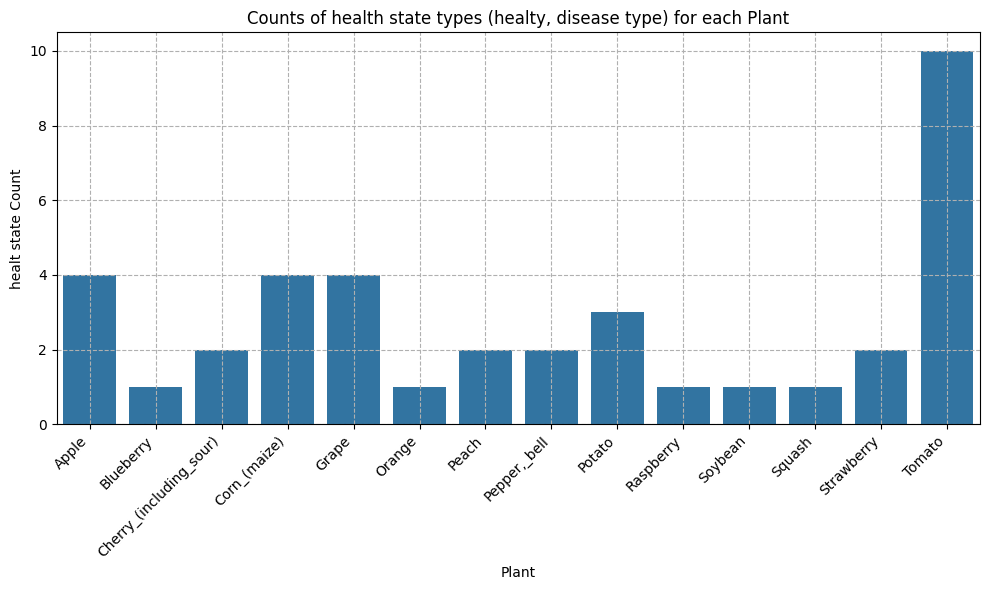

In [85]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability
# Create the count plot for NewPlantDiseases_counts_df
sns.countplot(x='Plant', data=NewPlantDiseases_counts_df)

# Set the title and labels
plt.title('Counts of health state types (healty, disease type) for each Plant')
plt.xlabel('Plant')
plt.ylabel('healt state Count')

# Rotate x-axis labels and align them to the right
plt.xticks(rotation=45, ha='right')

# Add dashed grid lines
plt.grid(True, linestyle='--')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Save the figure (optional, uncomment if needed)
# plt.savefig('NewPlantDisease_plant.png', bbox_inches='tight')

# Display the plot
plt.show()


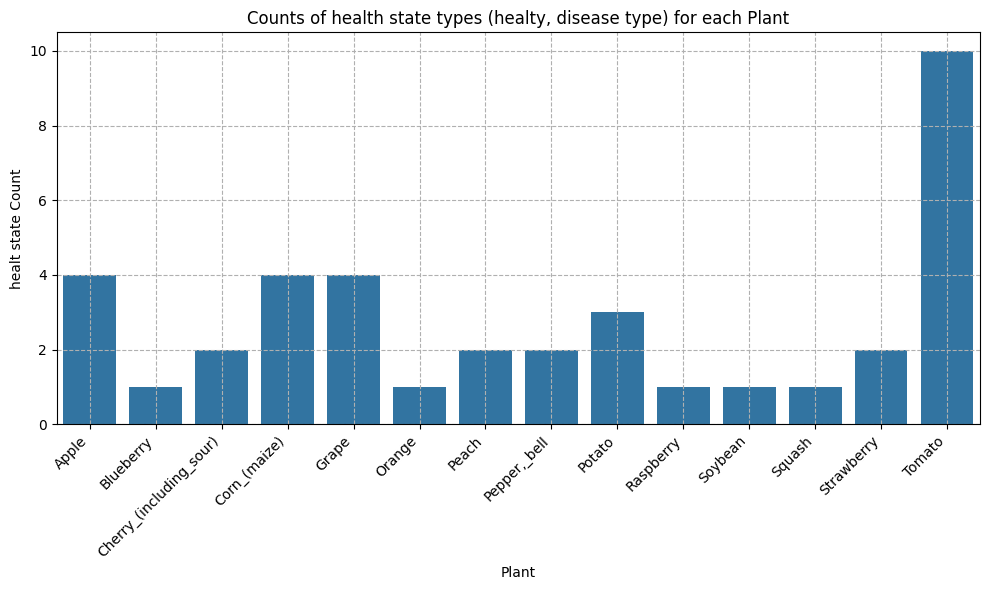

In [89]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability
# Create the count plot for NewPlantDiseases_counts_df
sns.countplot(x='Plant', data=PlantDisease_counts_df)

# Set the title and labels
plt.title('Counts of health state types (healty, disease type) for each Plant')
plt.xlabel('Plant')
plt.ylabel('healt state Count')

# Rotate x-axis labels and align them to the right
plt.xticks(rotation=45, ha='right')

# Add dashed grid lines
plt.grid(True, linestyle='--')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Save the figure (optional, uncomment if needed)
# plt.savefig('NewPlantDisease_plant.png', bbox_inches='tight')

# Display the plot
plt.show()

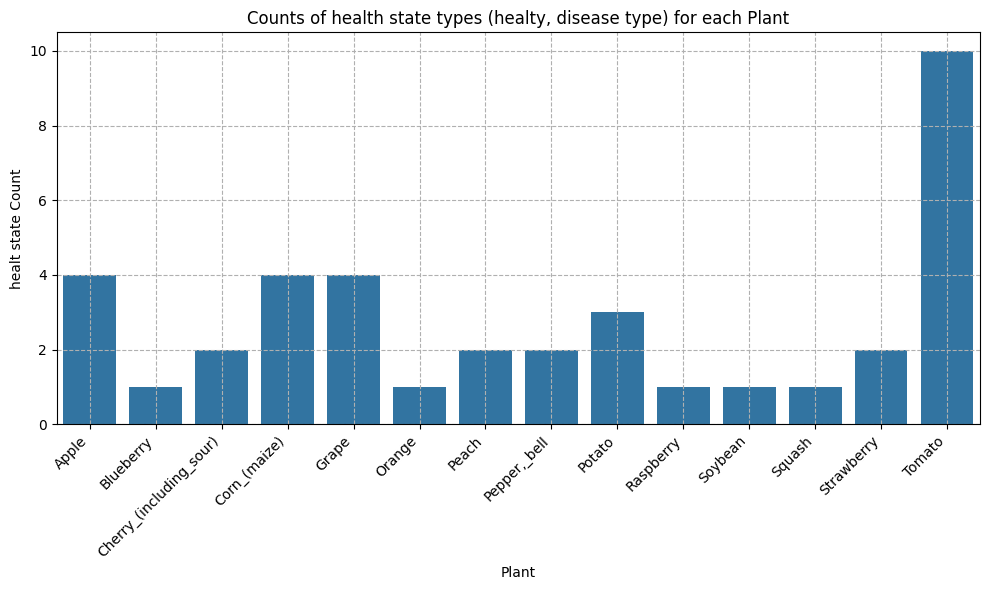

In [90]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability
# Create the count plot for NewPlantDiseases_counts_df
sns.countplot(x='Plant', data=PlantVillage_counts_df)

# Set the title and labels
plt.title('Counts of health state types (healty, disease type) for each Plant')
plt.xlabel('Plant')
plt.ylabel('healt state Count')

# Rotate x-axis labels and align them to the right
plt.xticks(rotation=45, ha='right')

# Add dashed grid lines
plt.grid(True, linestyle='--')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Save the figure (optional, uncomment if needed)
# plt.savefig('NewPlantDisease_plant.png', bbox_inches='tight')

# Display the plot
plt.show()

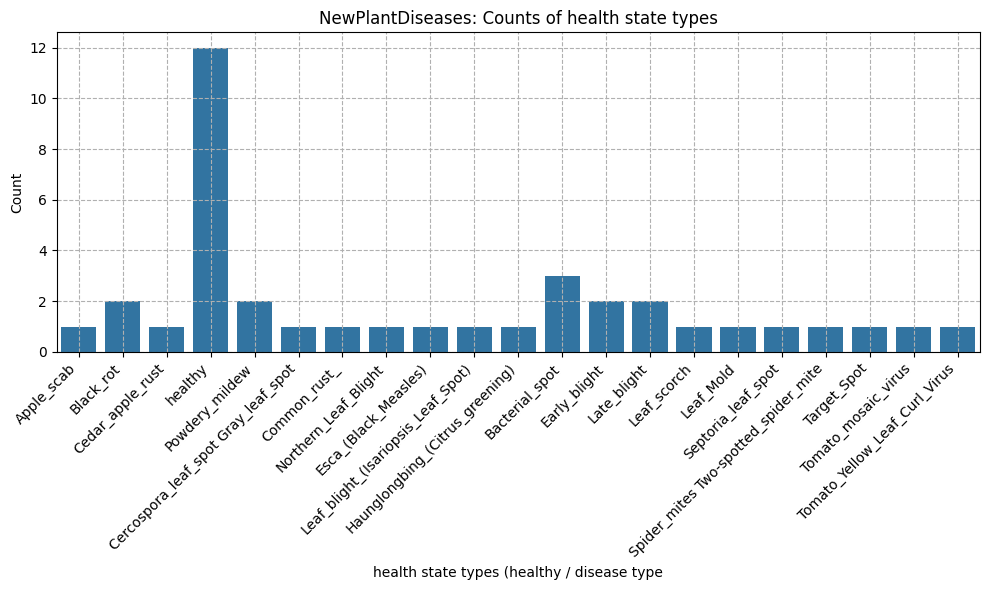

In [91]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability
# Create the count plot for NewPlantDiseases_counts_df
sns.countplot(x='Disease', data=NewPlantDiseases_counts_df)

# Optional: Uncomment the following line if you want to use PlantDisease_counts_df instead
# sns.countplot(x='Plant', data=PlantDisease_counts_df)

# Set the title and labels
plt.title('NewPlantDiseases: Counts of health state types')
plt.xlabel('health state types (healthy / disease type')
plt.ylabel('Count')

# Rotate x-axis labels and align them to the right
plt.xticks(rotation=45, ha='right')

# Add dashed grid lines
plt.grid(True, linestyle='--')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Save the figure (optional, uncomment if needed)
# plt.savefig('NewPlantDisease_plant.png', bbox_inches='tight')

# Display the plot
plt.show()

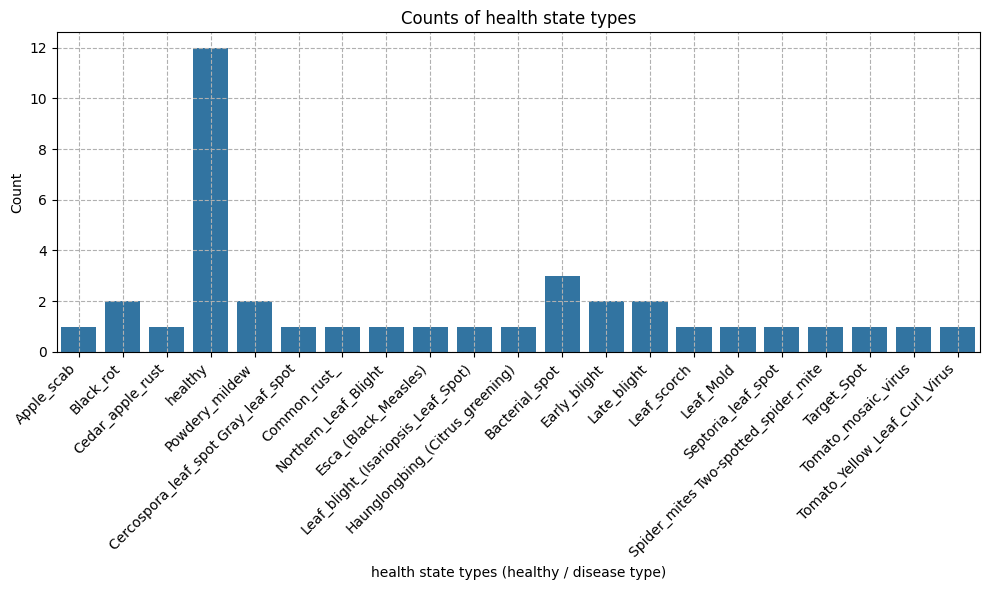

In [94]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability
# Create the count plot for NewPlantDiseases_counts_df
sns.countplot(x='Disease', data=PlantDisease_counts_df)

# Optional: Uncomment the following line if you want to use PlantDisease_counts_df instead
# sns.countplot(x='Plant', data=PlantDisease_counts_df)

# Set the title and labels
plt.title('Counts of health state types')
plt.xlabel('health state types (healthy / disease type)')
plt.ylabel('Count')

# Rotate x-axis labels and align them to the right
plt.xticks(rotation=45, ha='right')

# Add dashed grid lines
plt.grid(True, linestyle='--')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Save the figure (optional, uncomment if needed)
# plt.savefig('NewPlantDisease_plant.png', bbox_inches='tight')

# Display the plot
plt.show()

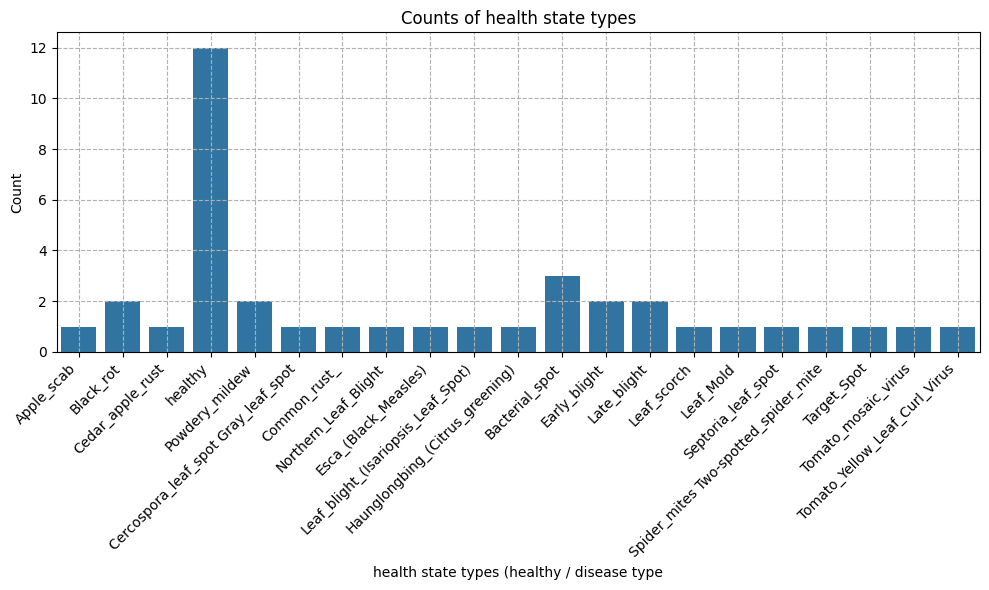

In [93]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability
# Create the count plot for NewPlantDiseases_counts_df
sns.countplot(x='Disease', data=PlantVillage_counts_df)

# Optional: Uncomment the following line if you want to use PlantDisease_counts_df instead
# sns.countplot(x='Plant', data=PlantDisease_counts_df)

# Set the title and labels
plt.title('Counts of health state types')
plt.xlabel('health state types (healthy / disease type')
plt.ylabel('Count')

# Rotate x-axis labels and align them to the right
plt.xticks(rotation=45, ha='right')

# Add dashed grid lines
plt.grid(True, linestyle='--')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Save the figure (optional, uncomment if needed)
# plt.savefig('NewPlantDisease_plant.png', bbox_inches='tight')

# Display the plot
plt.show()

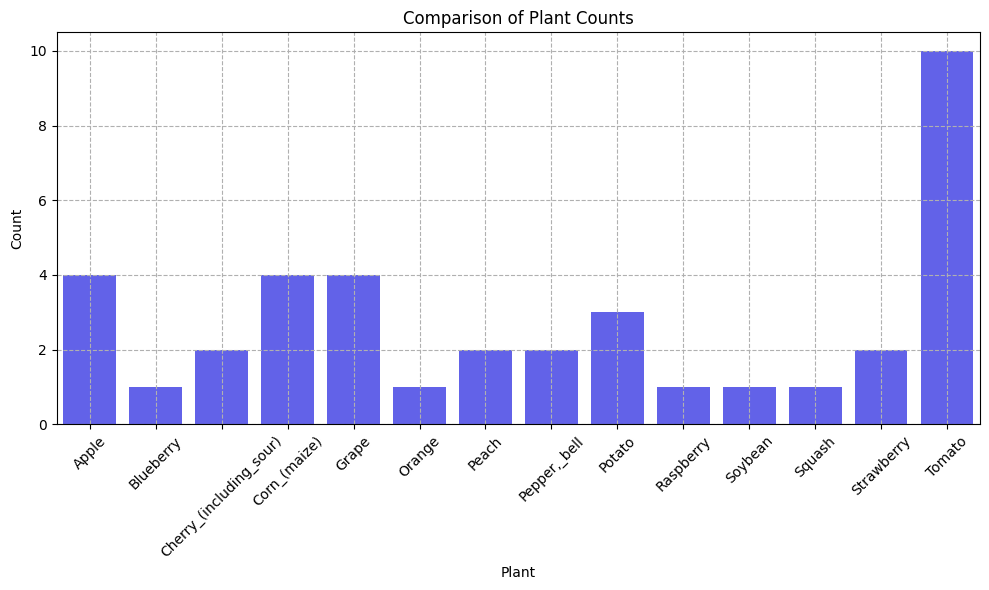

In [84]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = plt.gca()

# Plot the first countplot
sns.countplot(x='Plant', data=NewPlantDiseases_counts_df, ax=ax, color='blue', alpha=0.7)
#sns.countplot(x='Plant', data=NewPlantDiseases_counts_df, ax=ax, alpha=0.7, hue='Disease')

# Plot the second countplot, shift it slightly on the x-axis
#sns.countplot(x='Plant', data=PlantVillage_counts_df, ax=ax, color='red', alpha=0.7, 
              #linewidth=5, edgecolor=sns.color_palette("dark", 3))

# Customize labels, title, etc. if needed
plt.title('Comparison of Plant Counts')
plt.xlabel('Plant')
plt.ylabel('Count')

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Add dashed grid lines
plt.grid(True, linestyle='--')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
# Show plot
plt.show()

# health state for each plant type

<Figure size 1000x800 with 0 Axes>

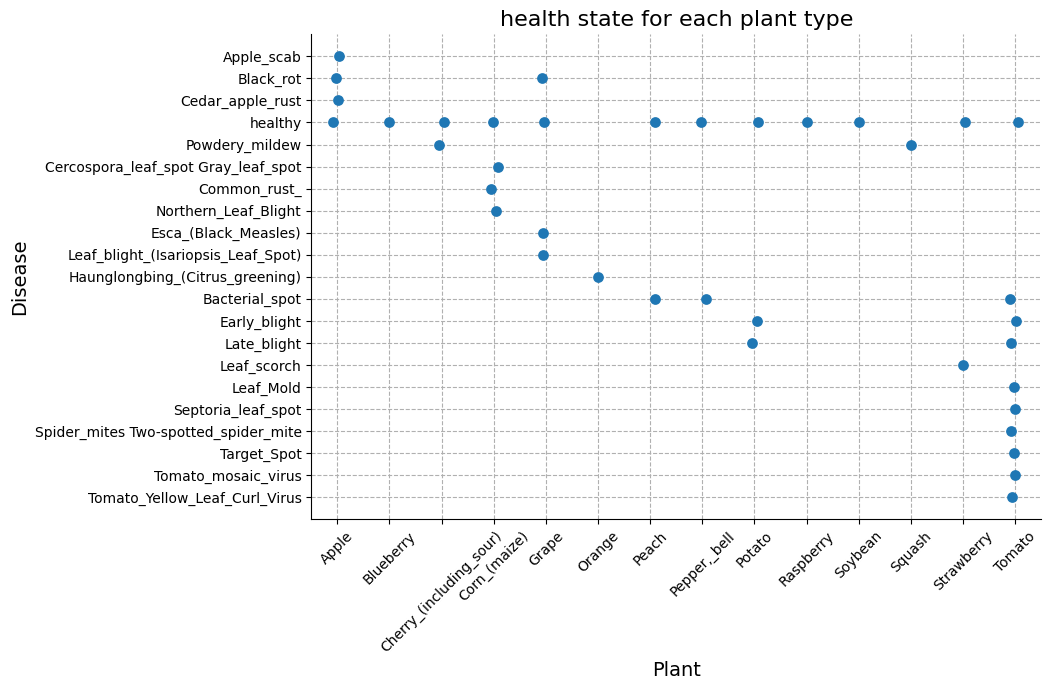

In [138]:

# Set up the figure and axis
plt.figure(figsize=(10, 8))  # Adjust the figure size to make it bigger

# Create the catplot with the updated size
sns.catplot(x='Plant', y='Disease', data=NewPlantDiseases_counts_df, height=7, aspect=1.5, s=60)

# Customize labels, title, etc.
plt.title('health state for each plant type', fontsize=16)
plt.xlabel('Plant', fontsize=14)
plt.ylabel('Disease', fontsize=14)

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add dashed grid lines
plt.grid(True, linestyle='--')

plt.savefig('health_state.png', bbox_inches='tight')
# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show plot
plt.show()


<Figure size 1000x800 with 0 Axes>

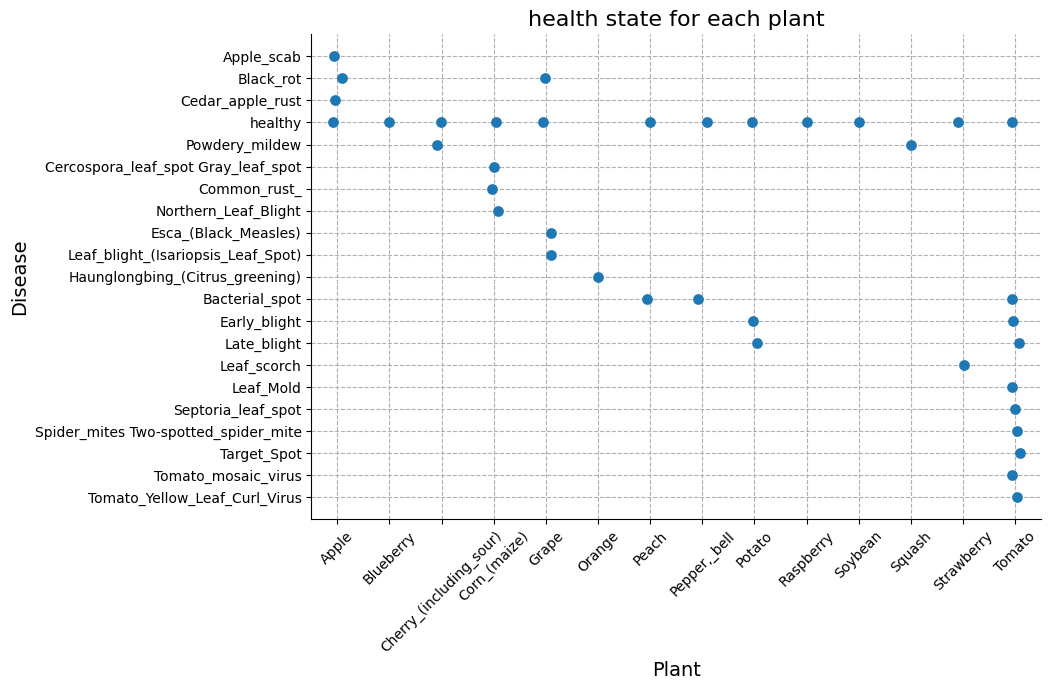

In [115]:
# Set up the figure and axis
plt.figure(figsize=(10, 8))  # Adjust the figure size to make it bigger

# Create the catplot with the updated size
sns.catplot(x='Plant', y='Disease', data=PlantDisease_counts_df, height=7, aspect=1.5, s=60)

# Customize labels, title, etc.
plt.title('health state for each plant', fontsize=16)
plt.xlabel('Plant', fontsize=14)
plt.ylabel('Disease', fontsize=14)

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add dashed grid lines
plt.grid(True, linestyle='--')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show plot
plt.show()

<Figure size 1000x800 with 0 Axes>

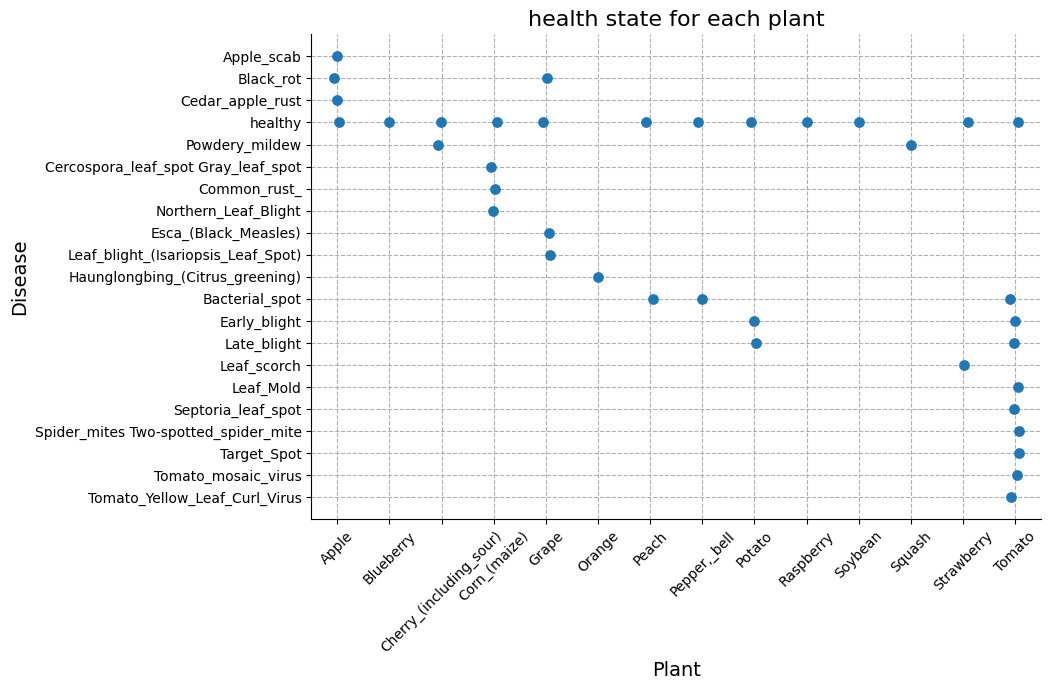

In [116]:
# Set up the figure and axis
plt.figure(figsize=(10, 8))  # Adjust the figure size to make it bigger

# Create the catplot with the updated size
sns.catplot(x='Plant', y='Disease', data=PlantVillage_counts_df, height=7, aspect=1.5, s=60)

# Customize labels, title, etc.
plt.title('health state for each plant', fontsize=16)
plt.xlabel('Plant', fontsize=14)
plt.ylabel('Disease', fontsize=14)

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add dashed grid lines
plt.grid(True, linestyle='--')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show plot
plt.show()

# plant counts compersion 

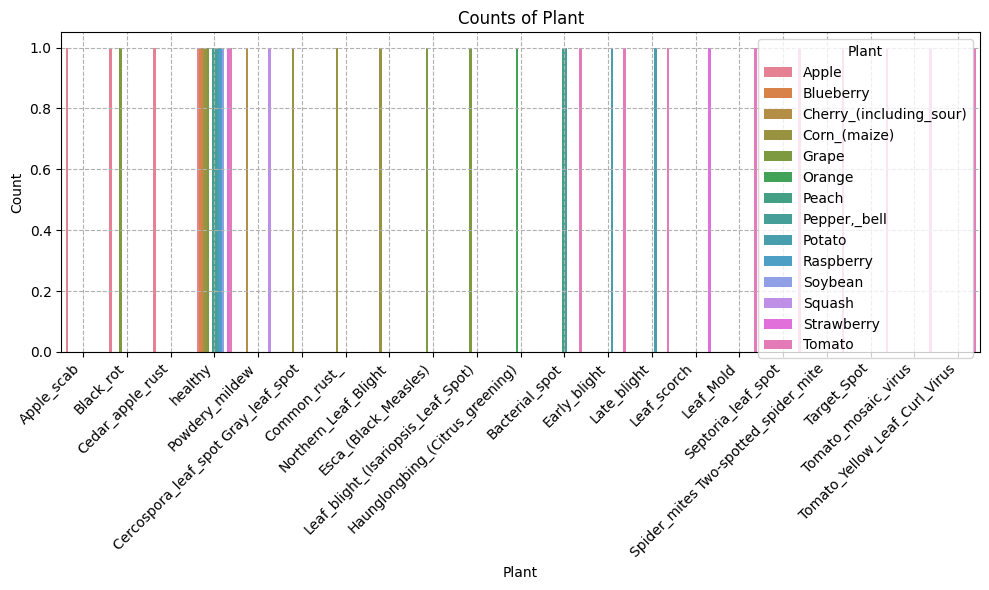

In [43]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability
# Create the count plot for NewPlantDiseases_counts_df
sns.countplot(x='Disease', data=NewPlantDiseases_counts_df, hue='Plant')

# Optional: Uncomment the following line if you want to use PlantDisease_counts_df instead
# sns.countplot(x='Plant', data=PlantDisease_counts_df)

# Set the title and labels
plt.title('Counts of Plant')
plt.xlabel('Plant')
plt.ylabel('Count')

# Rotate x-axis labels and align them to the right
plt.xticks(rotation=45, ha='right')

# Add dashed grid lines
plt.grid(True, linestyle='--')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Save the figure (optional, uncomment if needed)
# plt.savefig('NewPlantDisease_plant.png', bbox_inches='tight')

# Display the plot
plt.show()


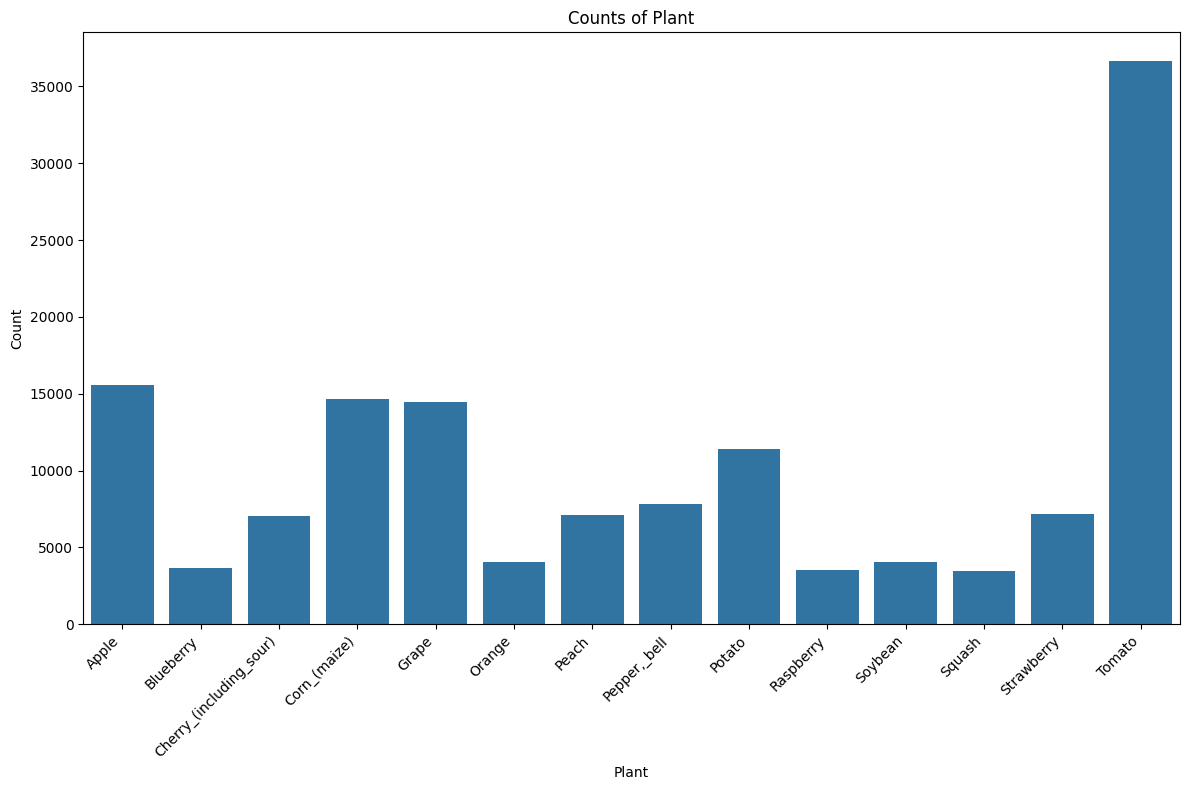

In [139]:
# Group by 'plant' and sum the counts
NewPlantDiseases_Plant_grouped = NewPlantDiseases_counts_df.groupby('Plant').sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Plant', y='Count', data=NewPlantDiseases_Plant_grouped)
plt.title('Counts of Plant')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.xlabel('Plant')
plt.ylabel('Count')
plt.savefig('NewPlantDisease_plant.png',  bbox_inches='tight')
plt.show()

<Axes: title={'center': 'New Plant Diseases Dataset'}, xlabel='Disease', ylabel='Count'>

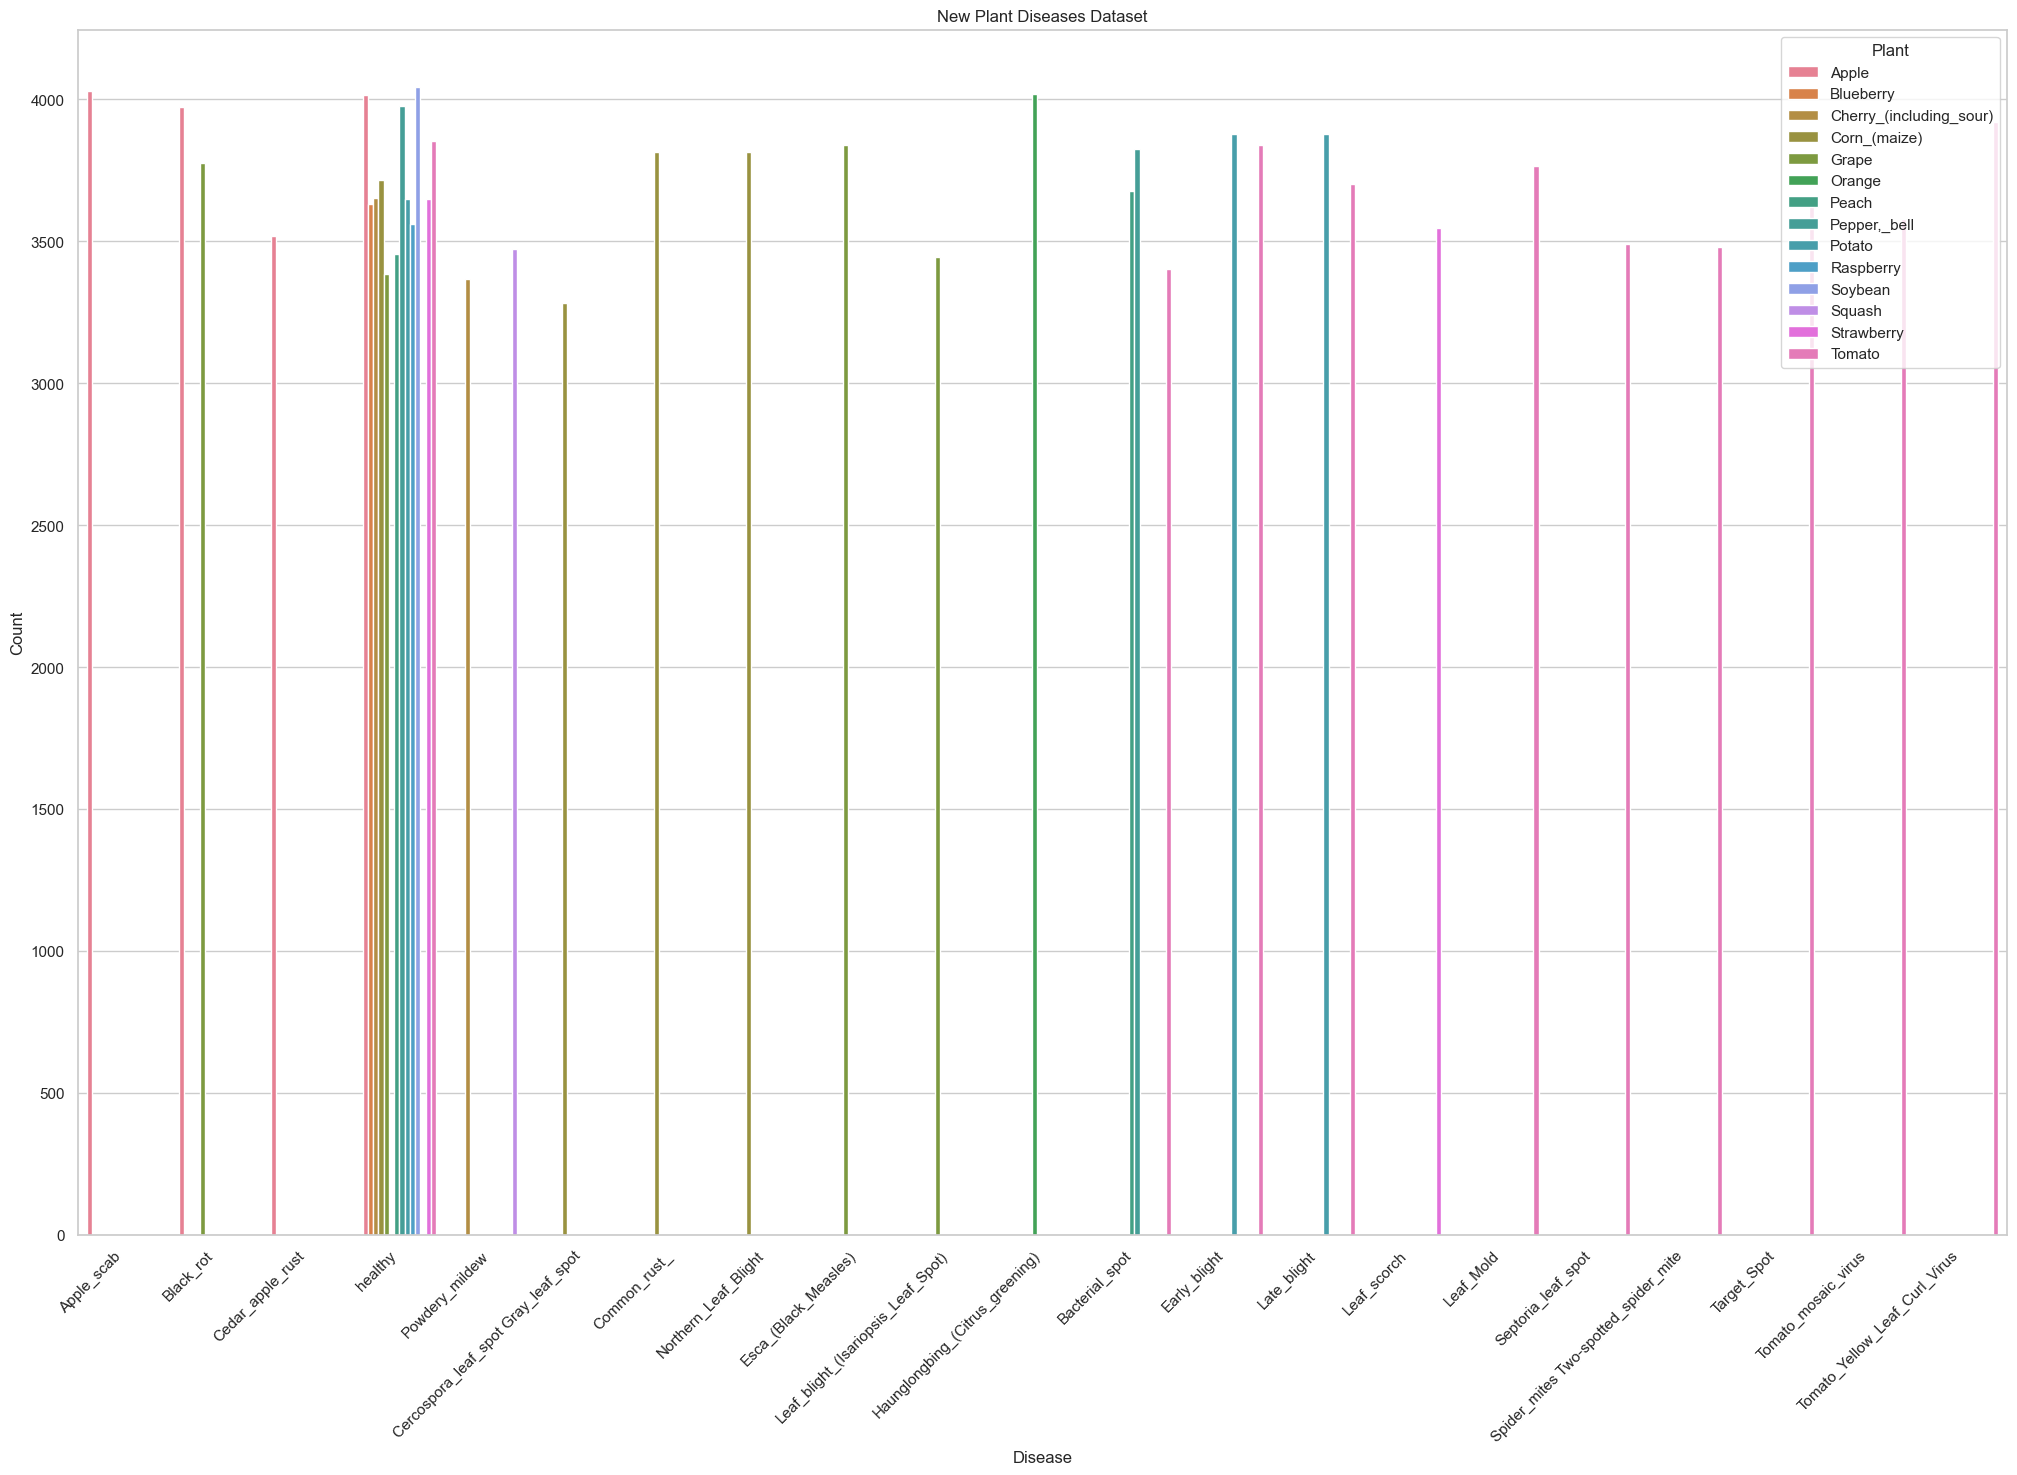

In [99]:
plt.figure(figsize=(20, 13))  # Adjust figure size as needed
plt.title('New Plant Diseases Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
sns.barplot(NewPlantDiseases_counts_df, x="Disease", y="Count", hue="Plant")

<Axes: title={'center': 'Plant Disease Dataset'}, xlabel='Disease', ylabel='Count'>

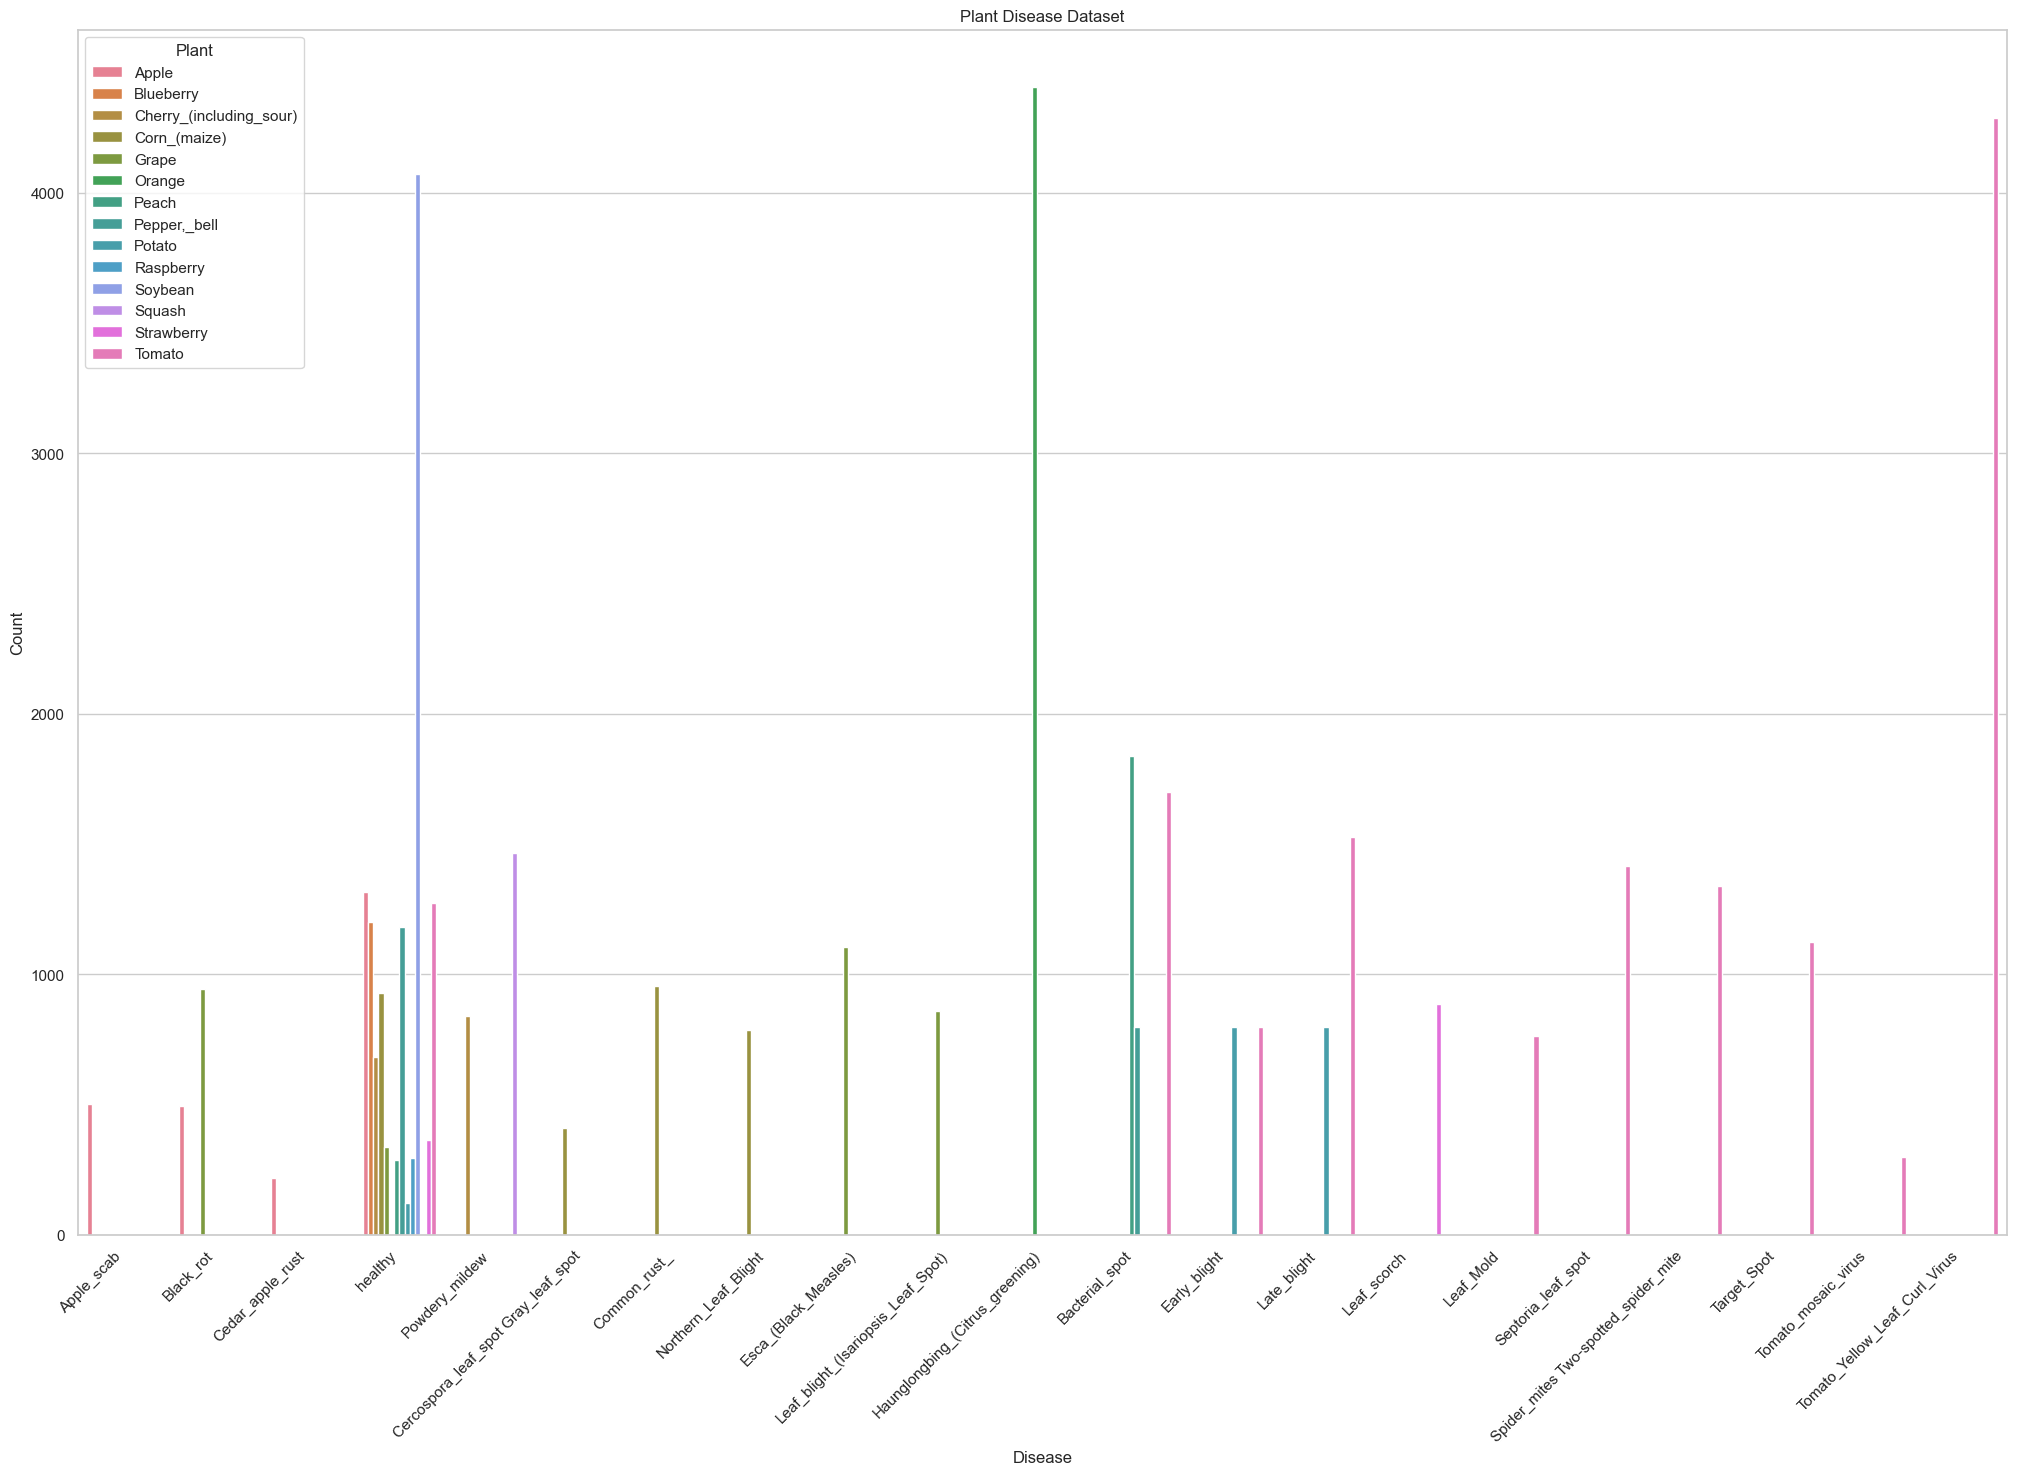

In [101]:
plt.figure(figsize=(20, 13))  # Adjust figure size as needed
plt.title('Plant Disease Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
sns.barplot(PlantDisease_counts_df, x="Disease", y="Count", hue="Plant")

<Axes: title={'center': 'Plant Village Dataset'}, xlabel='Disease', ylabel='Count'>

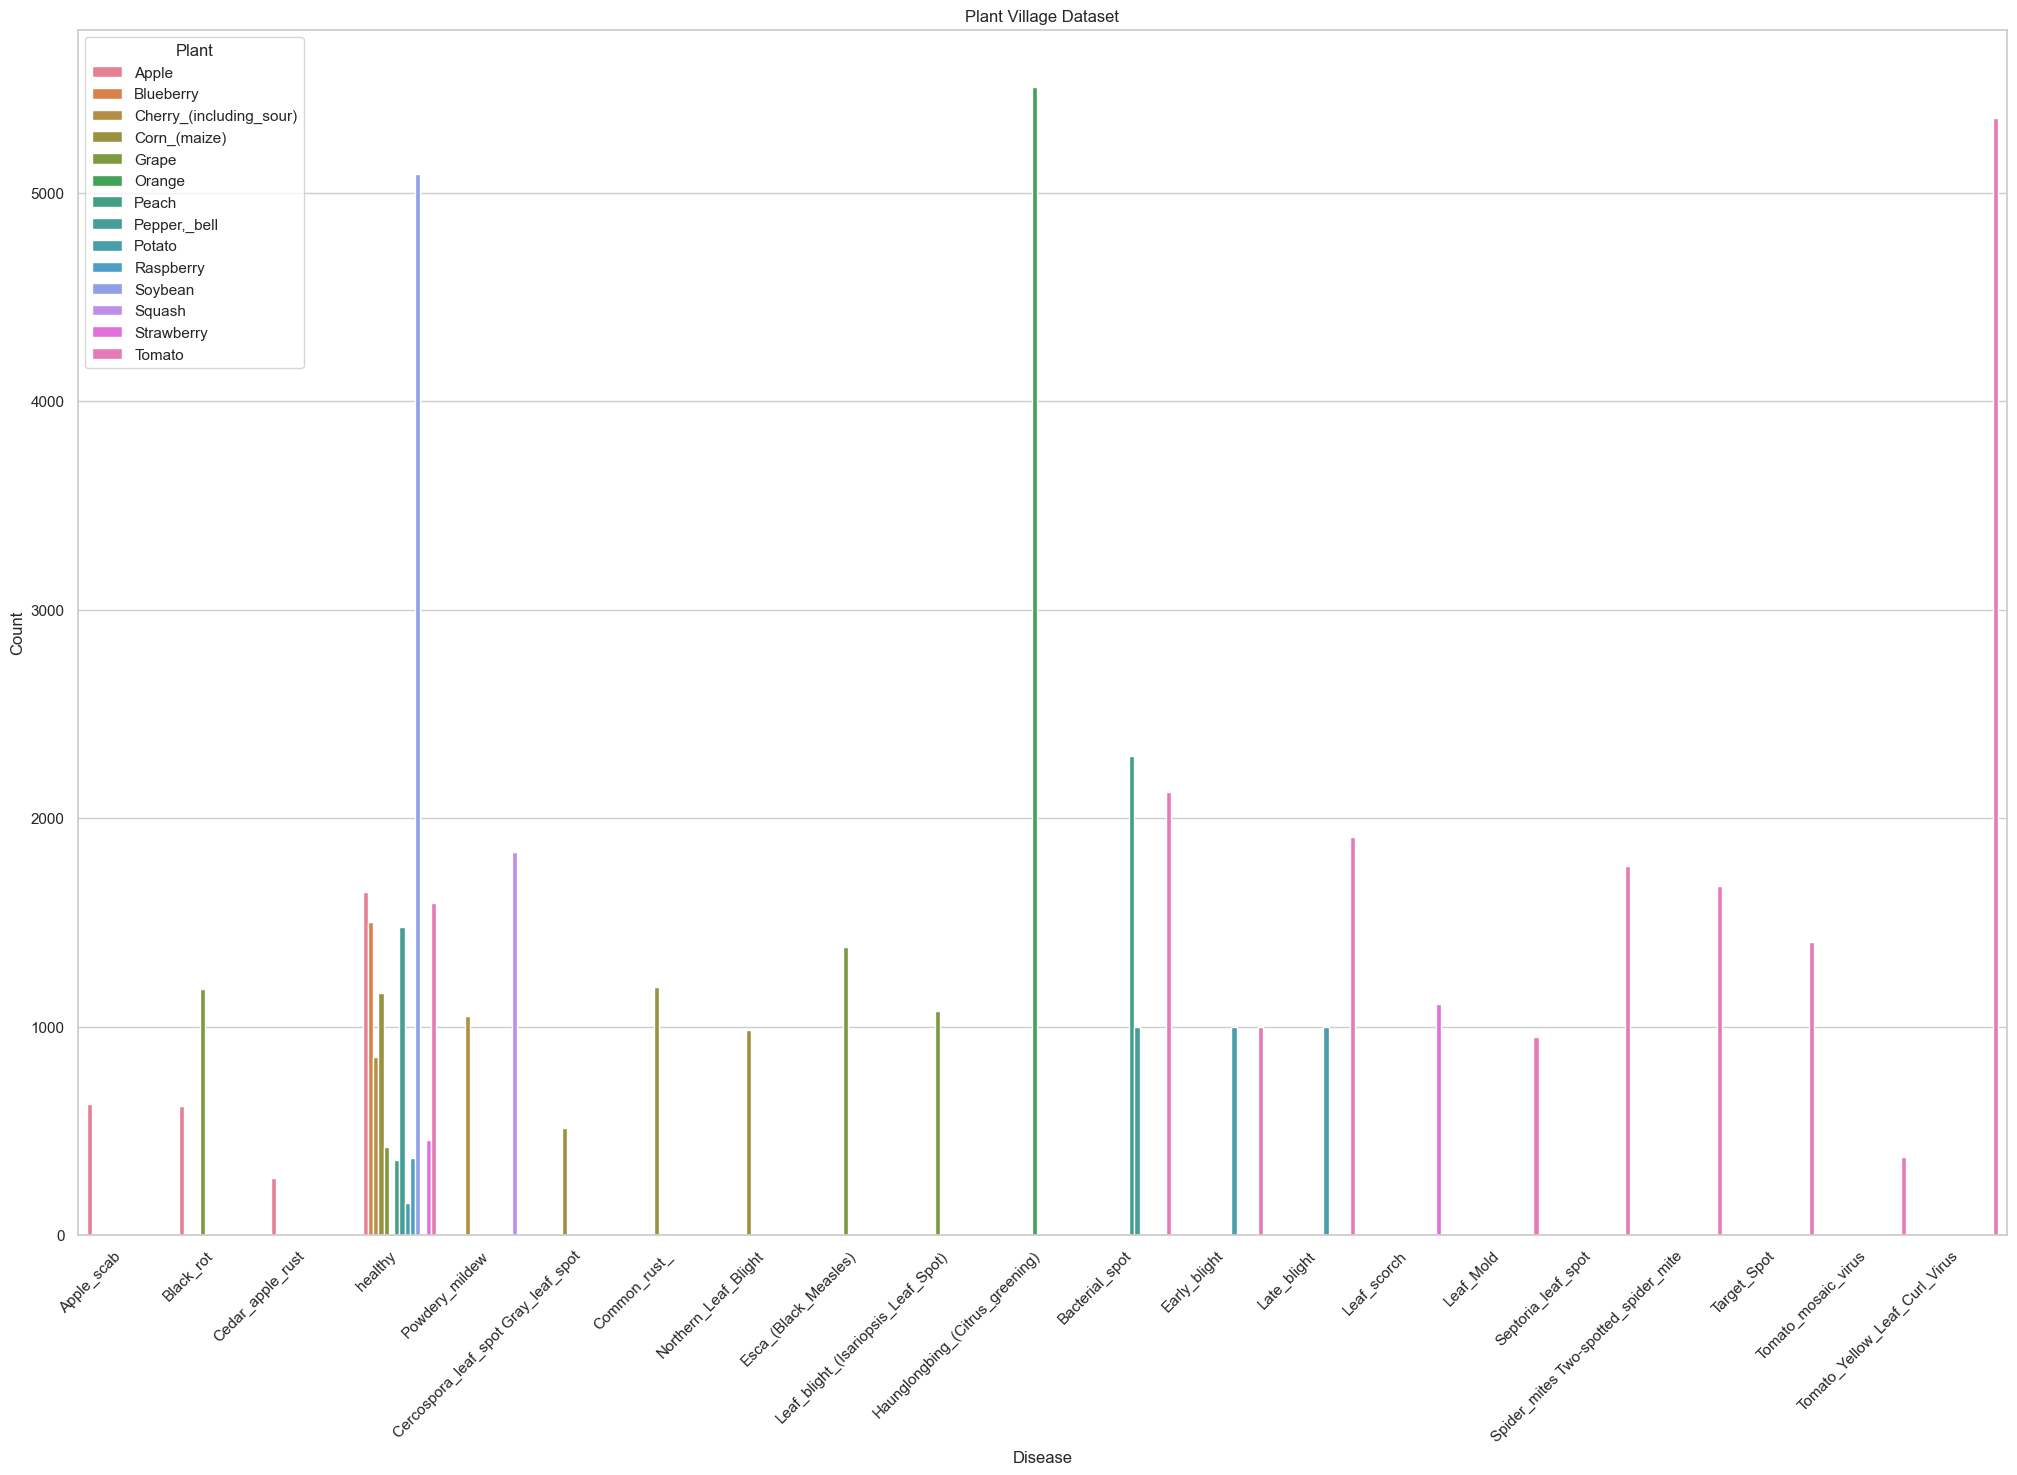

In [100]:
plt.figure(figsize=(20, 13))  # Adjust figure size as needed
plt.title('Plant Village Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
sns.barplot(PlantVillage_counts_df, x="Disease", y="Count", hue="Plant")

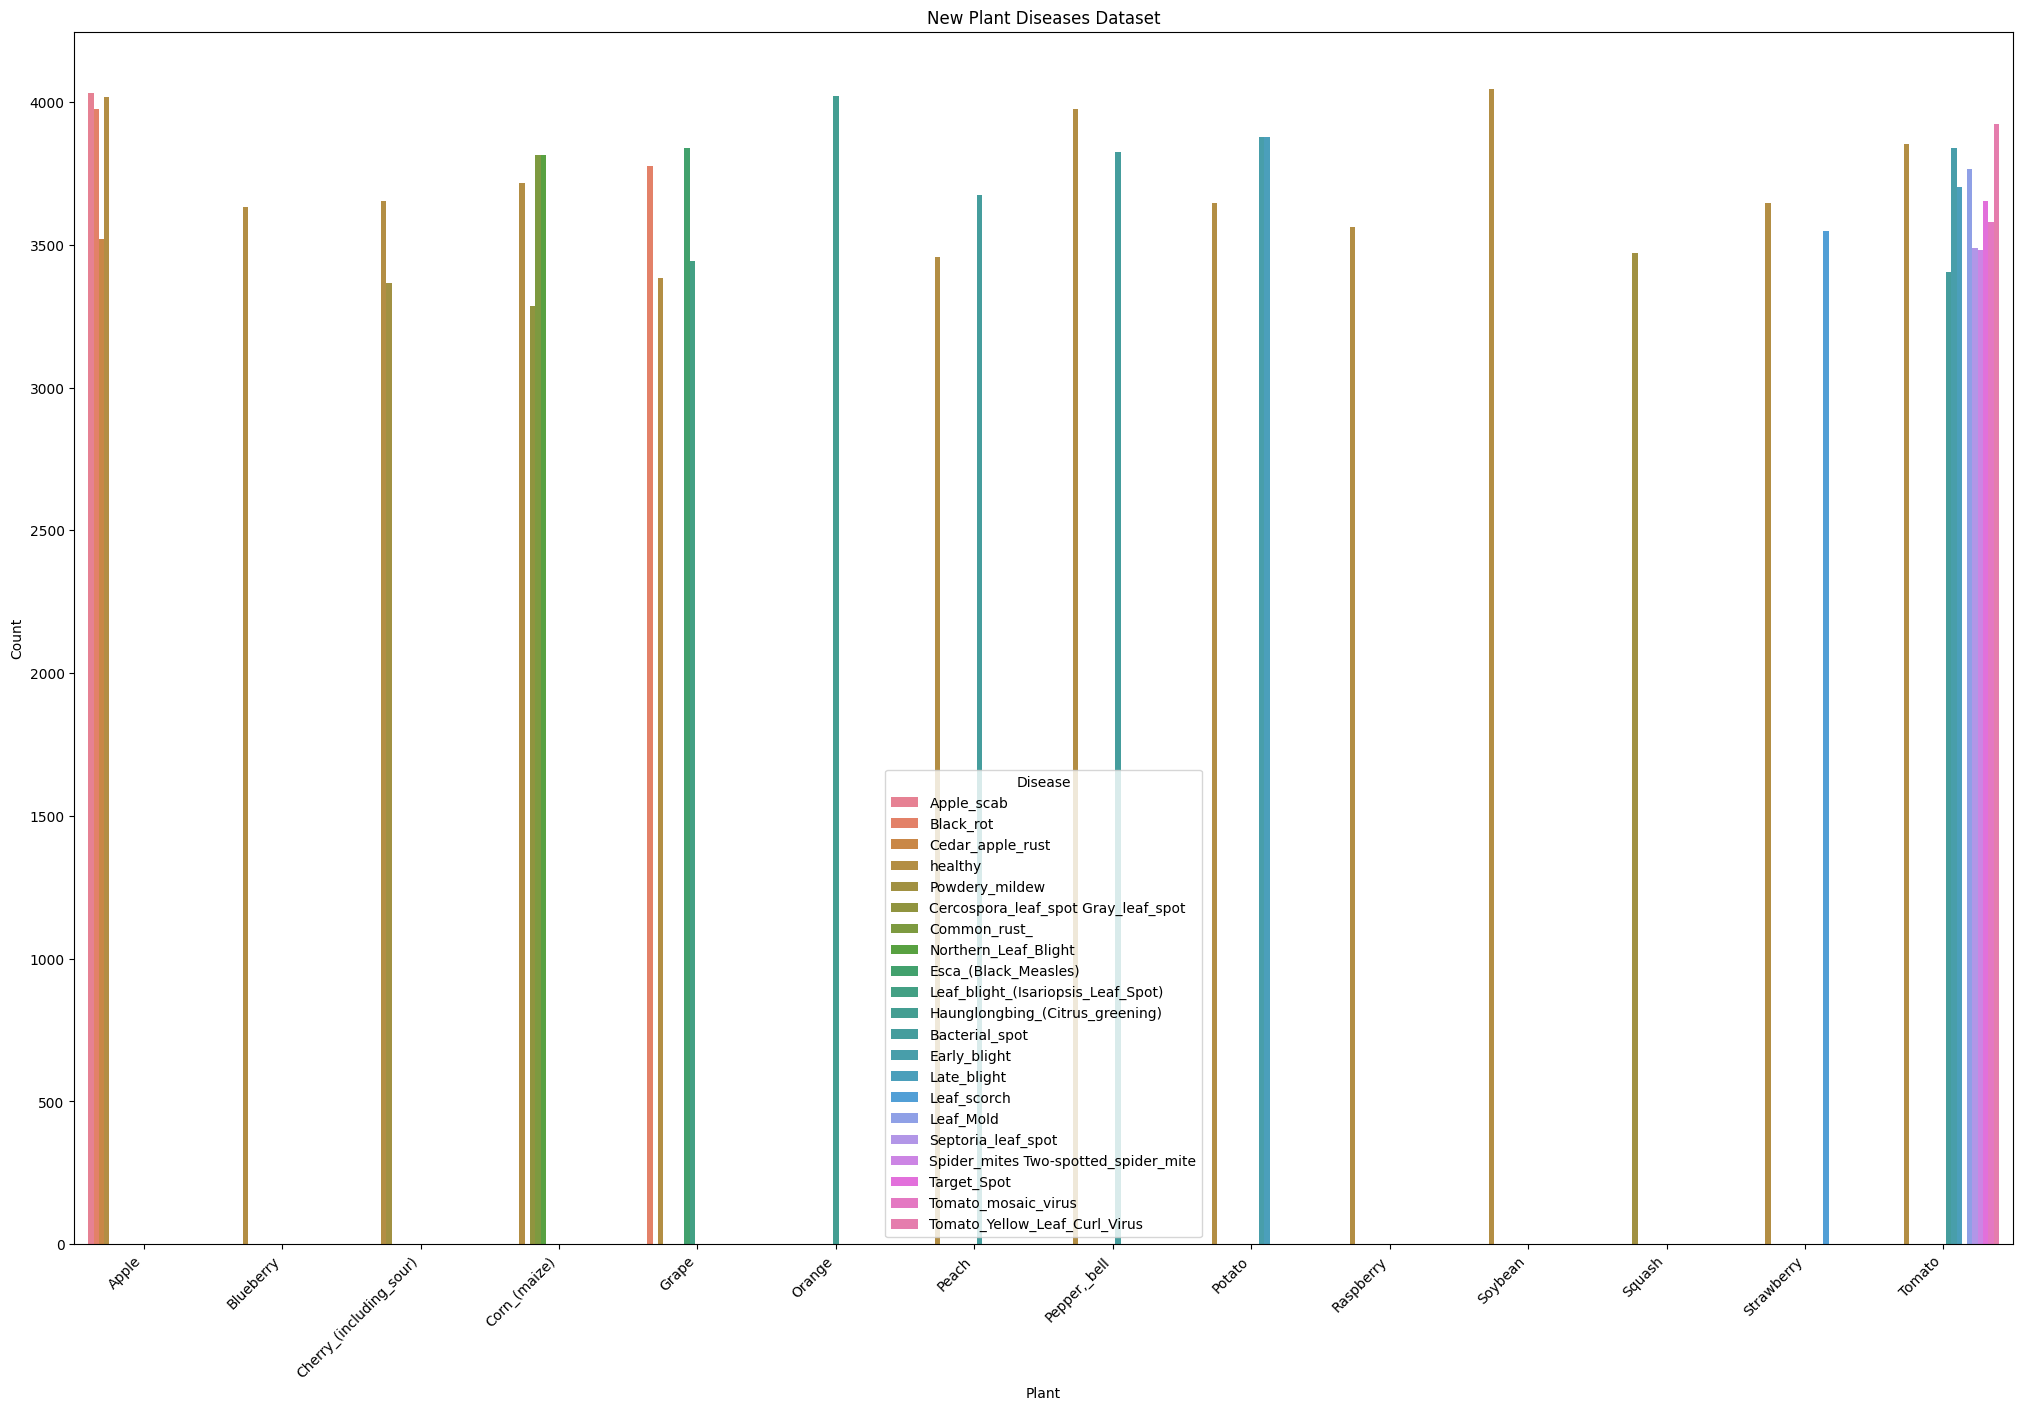

In [141]:
plt.figure(figsize=(20, 13))  # Adjust figure size as needed
plt.title('New Plant Diseases Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
sns.barplot(NewPlantDiseases_counts_df, x="Plant", y="Count", hue="Disease")
plt.savefig('plant_count_for_each_disease.png',  bbox_inches='tight')
plt.show()

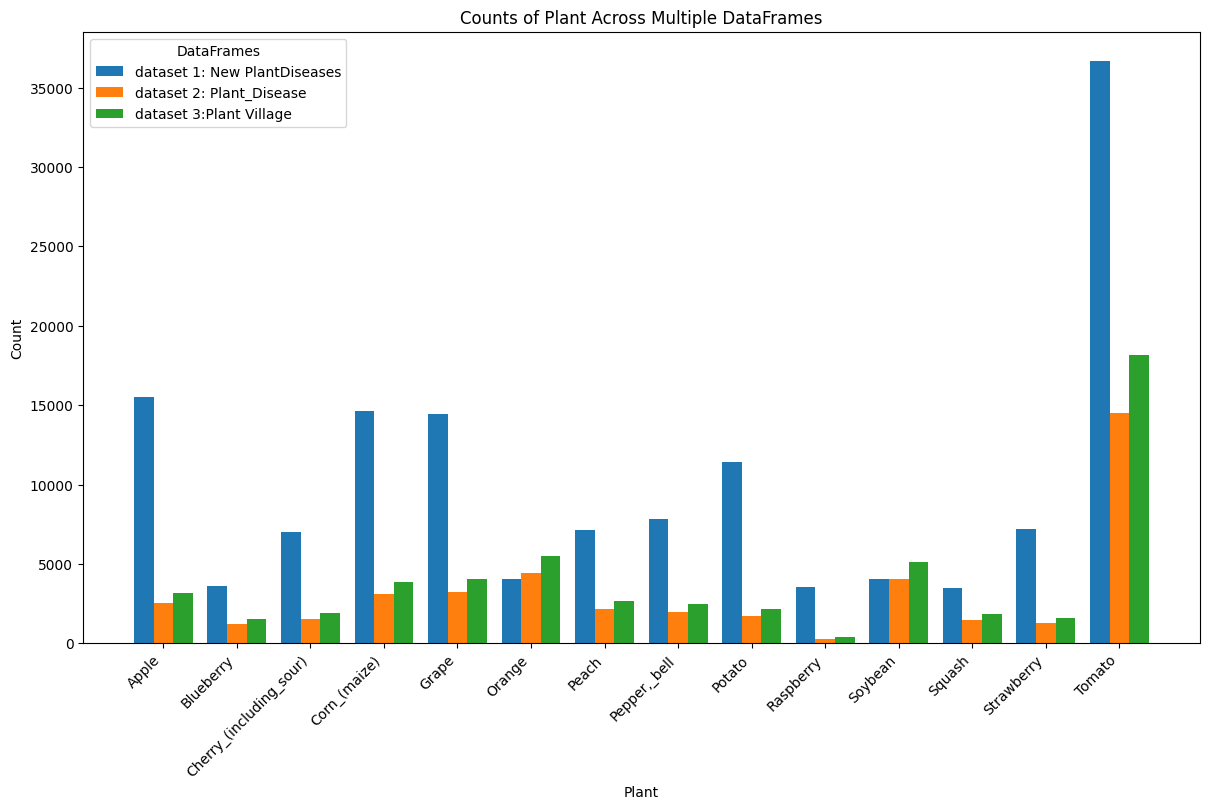

In [39]:
plot_multiple_dataframes([NewPlantDiseases_counts_df, PlantDisease_counts_df, PlantVillage_counts_df ],  
                         ["dataset 1: New PlantDiseases" , "dataset 2: Plant_Disease", "dataset 3:Plant Village" ] )

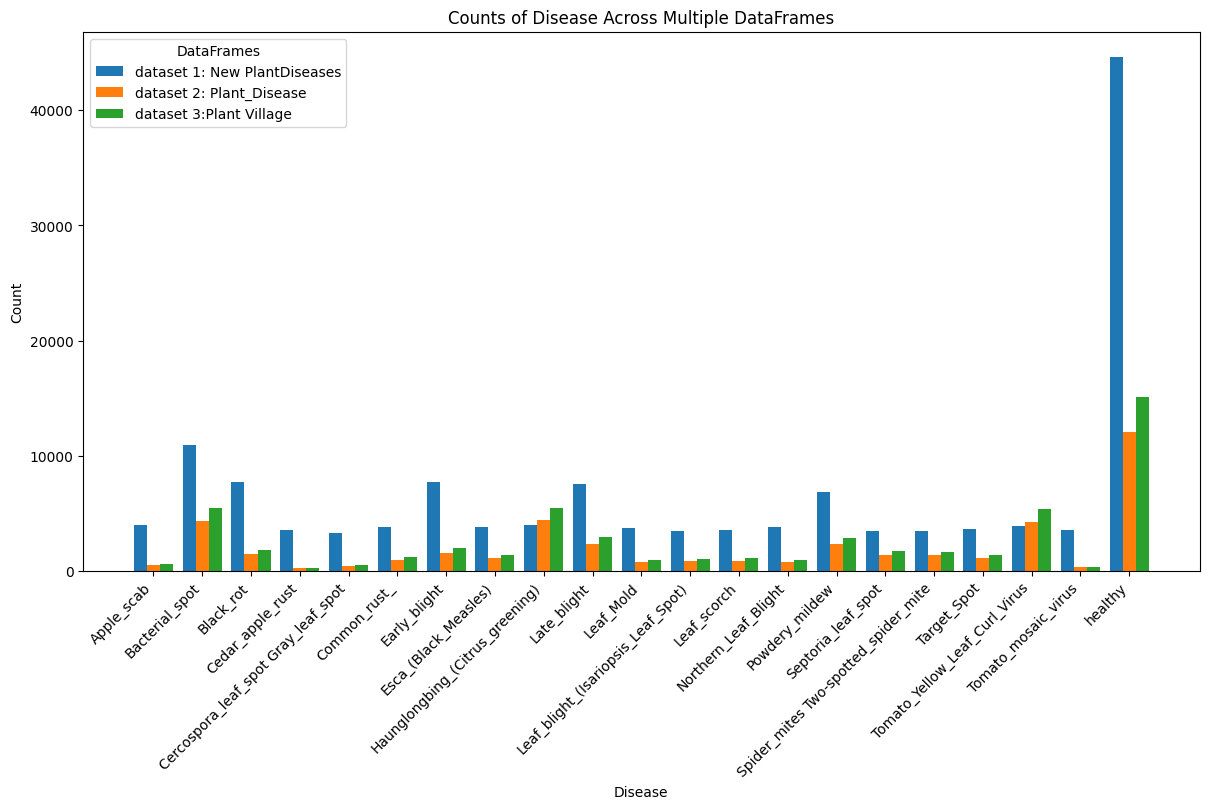

In [43]:
plot_multiple_dataframes_D([NewPlantDiseases_counts_df, PlantDisease_counts_df, PlantVillage_counts_df ],  
                         ["dataset 1: New PlantDiseases" , "dataset 2: Plant_Disease", "dataset 3:Plant Village" ] )

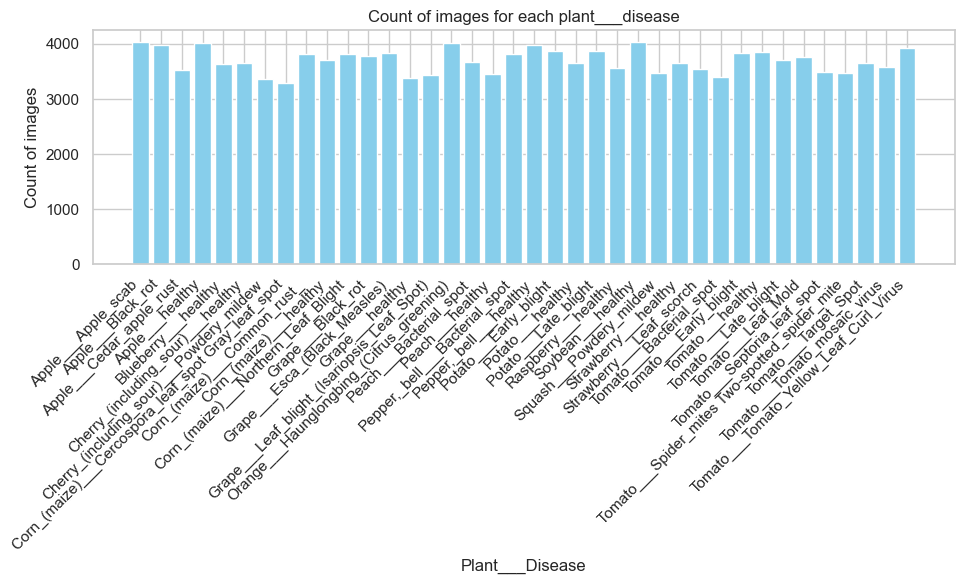

In [52]:
plot_image_counts_dict(NewPlantDiseases_images_counts)

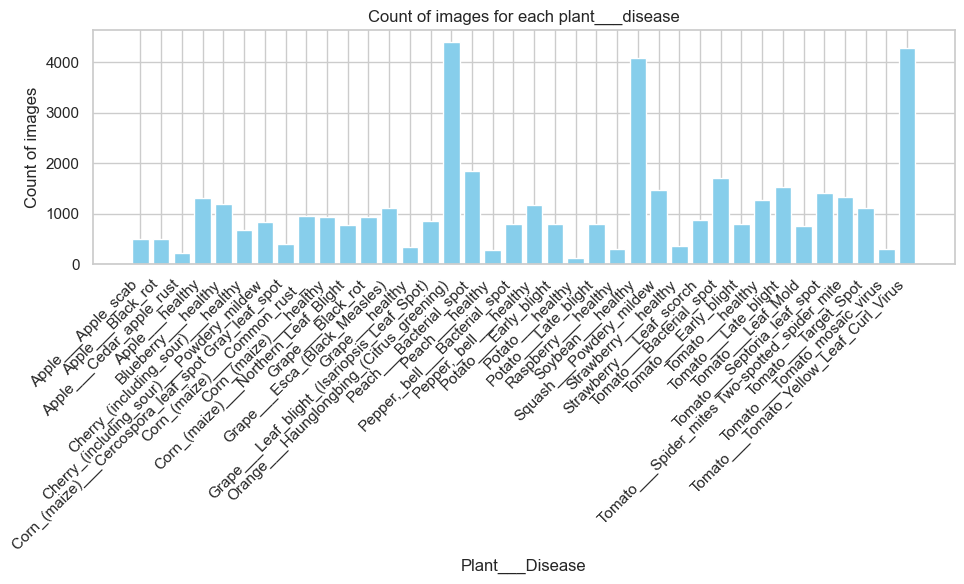

In [54]:
plot_image_counts_dict(PlantDisease_images_counts)

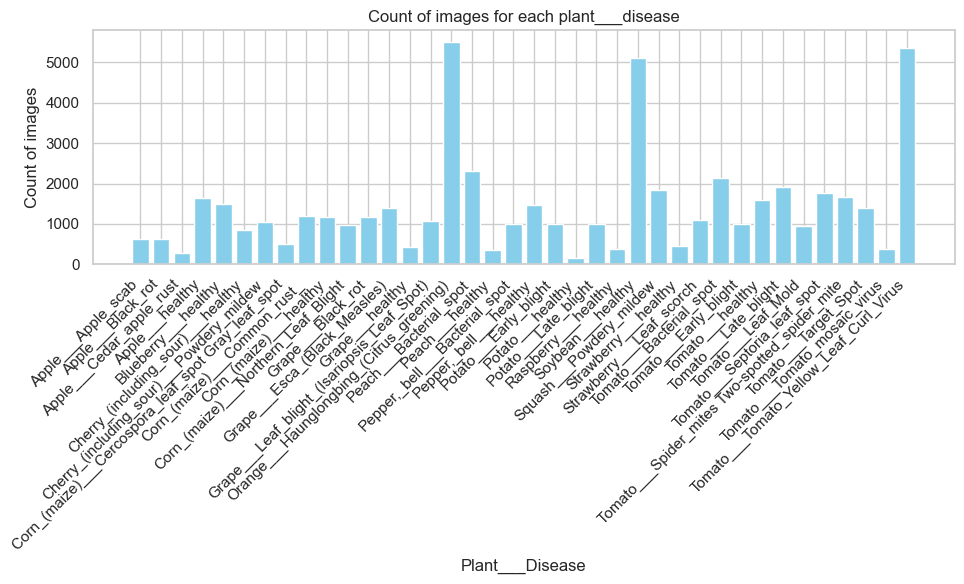

In [55]:
plot_image_counts_dict(PlantVillage_images_counts)

In [142]:
NewPlantDiseases_random_sample = give_random_sample(NewPlantDiseases_images_names_dict, base_path=NewPlantDiseases_path, seed=60, random_sample_size=3)

In [143]:
#plot_images(NewPlantDiseases_random_sample)

In [144]:
#plot_histograms(NewPlantDiseases_random_sample)

In [145]:
NewPlantDiseases_image_metrics = calculate_image_metrics(NewPlantDiseases_random_sample )

In [147]:
#NewPlantDiseases_image_metrics

In [149]:
#plot_image_metrics(NewPlantDiseases_image_metrics)

In [155]:
NewPlantDiseases_random_sample_avrInti = {key : np.mean(value) for key, value in NewPlantDiseases_random_sample.items()}

In [160]:
import pandas as pd
df_avrInt = dict_to_dataframe(NewPlantDiseases_random_sample_avrInti)

In [161]:
df_avrInt.head()

,Plant,Disease,Count
0,Apple,Apple_scab,103.135188
1,Apple,Black_rot,122.923269
2,Apple,Cedar_apple_rust,96.129929
3,Apple,healthy,114.698118
4,Blueberry,healthy,177.744081
